In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline

In [55]:
test = pd.read_csv('test.csv')
# coluna a ser predita NU_NOTA_MT

In [56]:
train = pd.read_csv('train.csv', index_col=[0])

In [57]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Análise dos dados

In [58]:
train.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0

In [59]:
train.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049', 'Q050'], dtype='object', length=166)

In [60]:
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'], dtype='object')

In [61]:
#função para obter % de dados nulos por coluna
def dados_nulos(train): 
        mis_val = train.isnull().sum()
        mis_val_percent = 100 * train.isnull().sum() / len(train)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valores Faltantes', 1 : '% do total'})
        return mis_val_table_ren_columns.round(2).sort_values('% do total', ascending=False)

In [62]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [63]:
dados_nulos(train)

,Valores Faltantes,% do total
SG_UF_ENTIDADE_CERTIFICACAO,12092,88.07
CO_UF_ENTIDADE_CERTIFICACAO,12092,88.07
NO_ENTIDADE_CERTIFICACAO,12092,88.07
Q041,10792,78.60
TP_SIT_FUNC_ESC,9448,68.81
TP_LOCALIZACAO_ESC,9448,68.81
TP_DEPENDENCIA_ADM_ESC,9448,68.81
SG_UF_ESC,9448,68.81
CO_UF_ESC,9448,68.81
NO_MUNICIPIO_ESC,9448,68.81


In [64]:
df_corr_pearson = pd.DataFrame (train.corr(method ='pearson')['NU_NOTA_MT'])

In [65]:
df_corr_pearson.sort_values('NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NU_NOTA_MT,1.000000
NU_NOTA_CN,0.584941
NU_NOTA_CH,0.529594
NU_NOTA_LC,0.494695
NU_NOTA_REDACAO,0.379376
TP_DEPENDENCIA_ADM_ESC,0.373233
NU_NOTA_COMP3,0.350307
NU_NOTA_COMP5,0.343337
NU_NOTA_COMP4,0.342282
NU_NOTA_COMP2,0.335638


In [66]:
df_corr_pearson.loc[df_corr_pearson['NU_NOTA_MT'] >= 0.4].sort_values('NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NU_NOTA_MT,1.000000
NU_NOTA_CN,0.584941
NU_NOTA_CH,0.529594
NU_NOTA_LC,0.494695


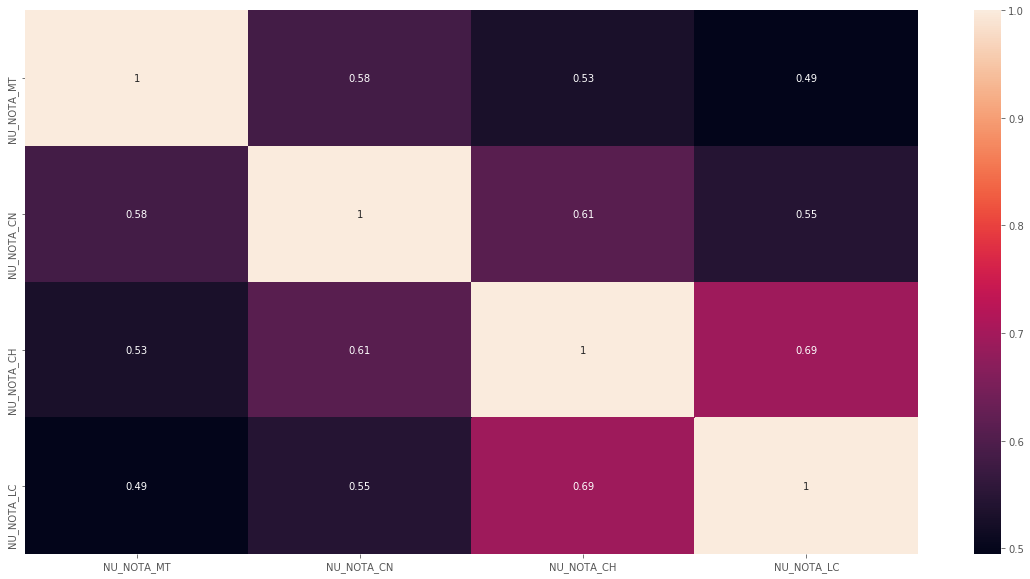

In [67]:
# Verificar correlações de features selecionadas:
plt.style.use('ggplot')
corr = train[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']].corr()
ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

In [68]:
train['NU_NOTA_COMP1'].fillna(0,inplace=True)
train['NU_NOTA_COMP2'].fillna(0,inplace=True)
train['NU_NOTA_COMP3'].fillna(0,inplace=True)
train['NU_NOTA_COMP4'].fillna(0,inplace=True)
train['NU_NOTA_COMP5'].fillna(0,inplace=True)
train['NU_NOTA_REDACAO'].fillna(0,inplace=True)
train['TP_DEPENDENCIA_ADM_ESC'].fillna(0,inplace=True)
train['NU_NOTA_CN'].fillna(0,inplace=True)
train['NU_NOTA_CH'].fillna(0,inplace=True)
train['NU_NOTA_LC'].fillna(0,inplace=True)
train['NU_NOTA_MT'].fillna(0,inplace=True)


test['NU_NOTA_COMP1'].fillna(0,inplace=True)
test['NU_NOTA_COMP2'].fillna(0,inplace=True)
test['NU_NOTA_COMP3'].fillna(0,inplace=True)
test['NU_NOTA_COMP4'].fillna(0,inplace=True)
test['NU_NOTA_COMP5'].fillna(0,inplace=True)
test['NU_NOTA_REDACAO'].fillna(0,inplace=True)
test['TP_DEPENDENCIA_ADM_ESC'].fillna(0,inplace=True)
test['NU_NOTA_CN'].fillna(0,inplace=True)
test['NU_NOTA_CH'].fillna(0,inplace=True)
test['NU_NOTA_LC'].fillna(0,inplace=True)

In [69]:
#train_features = train[['TP_DEPENDENCIA_ADM_ESC','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']]
train_features = train[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']]
train_features

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC
1,436.3,495.4,581.2
2,474.5,544.1,599.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
...,...,...,...
4582,438.2,419.7,394.5
4583,423.8,557.9,533.0
4584,460.5,528.9,569.3
4585,422.5,621.7,569.0


In [70]:
#test_features = test[['TP_DEPENDENCIA_ADM_ESC','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']]
test_features = test[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']]
test_features

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC
0,464.8,443.5,431.8
1,391.1,491.1,548.0
2,595.9,622.7,613.6
3,0.0,0.0,0.0
4,592.9,492.6,571.4
...,...,...,...
4571,398.3,558.2,511.6
4572,427.6,579.7,471.1
4573,639.2,643.8,604.9
4574,427.1,467.9,540.2


In [71]:
dados_nulos(train_features)

,Valores Faltantes,% do total
NU_NOTA_CN,0,0.0
NU_NOTA_CH,0,0.0
NU_NOTA_LC,0,0.0


In [72]:
dados_nulos(test_features)

,Valores Faltantes,% do total
NU_NOTA_CN,0,0.0
NU_NOTA_CH,0,0.0
NU_NOTA_LC,0,0.0


### Modelo

In [73]:
sc = StandardScaler()  
train_features = sc.fit_transform(train_features)  
teste = sc.fit_transform(test_features)  

X = train_features
y = train['NU_NOTA_MT']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [75]:
rf = RandomForestRegressor()

In [76]:
param_grid = { 
    'n_estimators': [200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
}
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}

In [77]:
rf_grid = RandomForestRegressor(max_depth = 4, max_features='auto', n_estimators=200)
rf_grid.fit(X_train, y_train)
predictions = rf_grid.predict(X_test)

In [78]:
predictions

array([  0.        , 594.07399061, 446.28802344, ..., 433.31436307,
       442.86333832, 515.68037726])

### Avaliação do Modelo

In [79]:
mae = metrics.mean_absolute_error(y_test, predictions )
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test, predictions)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

#https://www.datatechnotes.com/2019/10/accuracy-check-in-python-mae-mse-rmse-r.html

Results of sklearn.metrics:
MAE: 44.39872707087756
MSE: 4178.880221363488
RMSE: 64.64425899771369
R-Squared: 0.9202564611257809


### Submissão

In [80]:
predictions = rf_grid.predict(teste)

In [81]:
predictions

array([432.78192547, 457.87477384, 597.10622261, ..., 667.0112712 ,
       455.55810467,   0.        ])

In [82]:
df_resposta = pd.DataFrame()
df_resposta['NU_INSCRICAO'] = test['NU_INSCRICAO']
df_resposta['NU_NOTA_MT'] = np.around(predictions,2)
df_resposta.sort_values('NU_NOTA_MT', ascending=False)

,NU_INSCRICAO,NU_NOTA_MT
1773,c363bec718e45cd6bf8cba599cc3990d77f95c22,800.13
3272,890014a4e63d88574c62197a24fd43ba5749db83,800.13
3910,6d4bee056abcea733d36060113427081daae72d1,799.08
3799,91715815e6d1a2fd369379aa2451e4d535f000ad,799.08
1208,51ae593280f360e68b5400abcbb0d37f1ecade71,799.08
...,...,...
2295,e1fbacc49f716328a083f9dbf582634cc06a8788,0.00
2294,a4aabcd700916946086484109b24e93fcf1afd5a,0.00
2293,f3ec22388ed99e774eb6061402dcccec6c752f4a,0.00
2292,0e8c4d7cb64e48279a35f17e2a7daafbf086d74a,0.00


In [83]:
df_resposta.to_csv('answer.csv', index=False, header=True)

<img src="nota.PNG">

### referencias

https://www.datatechnotes.com/2019/10/accuracy-check-in-python-mae-mse-rmse-r.html

https://www.youtube.com/watch?time_continue=12&v=1s1JX5SMYCU&feature=emb_title